In [1]:
"""
重力改正 (正常重力和布格重力)
------------------------------------------------------

可实现的功能为获取重力异常和自由空气异常
通过夏威夷的原始重力数据示例
"""
import matplotlib.pyplot as plt
import numpy as np
from geoist.pfm.hawaii_gravity import fetch_hawaii_gravity
from geoist.pfm import normgra

In [2]:
# 加载数据
data = fetch_hawaii_gravity()
# 利用解析公式计算正常重力
gamma = normgra.gamma_closed_form(data['lat'], data['height'])
disturbance = data['gravity'] - gamma
# 利用布格板去除地形效应
bouguer = disturbance - normgra.bouguer_plate(data['topography'])

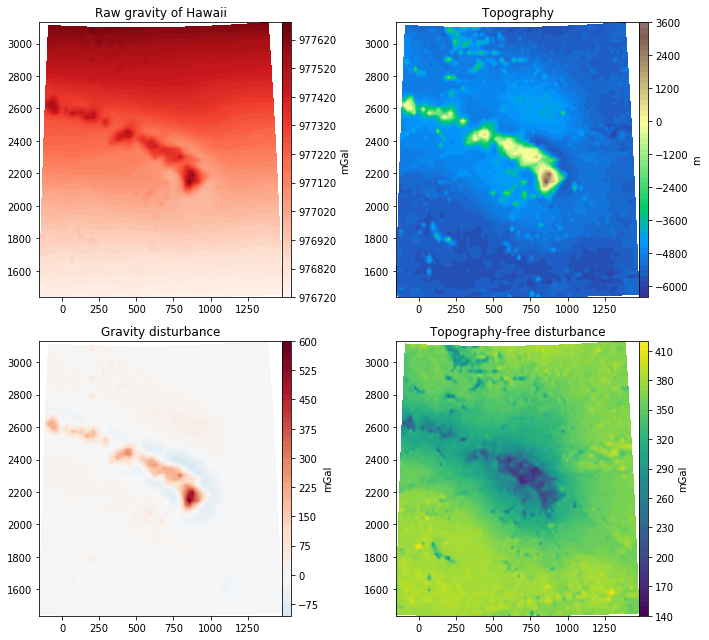

In [3]:
# 画图 UTM 坐标 (x is North and y is East)
shape = data['shape']
x, y = data['x'].reshape(shape), data['y'].reshape(shape)

fig, axes = plt.subplots(2, 2, figsize=(10, 9))
plt.rcParams['font.size'] = 10
#原始重力
ax = axes[0, 0]
ax.set_title('Raw gravity of Hawaii')
tmp = ax.contourf(y/1000, x/1000, data['gravity'].reshape(shape), 60,
                  cmap='Reds')
fig.colorbar(tmp, ax=ax, pad=0, aspect=30).set_label('mGal')
#地形
ax = axes[0, 1]
ax.set_title('Topography')
scale = np.abs([data['topography'].min(), data['topography'].max()]).max()
tmp = ax.contourf(y/1000, x/1000, data['topography'].reshape(shape), 60,
                  cmap='terrain', vmin=-scale, vmax=scale)
fig.colorbar(tmp, ax=ax, pad=0, aspect=30).set_label('m')

#重力异常
ax = axes[1, 0]
ax.set_title('Gravity disturbance')
scale = np.abs([disturbance.min(), disturbance.max()]).max()
tmp = ax.contourf(y/1000, x/1000, disturbance.reshape(shape), 60,
                  cmap='RdBu_r', vmin=-scale, vmax=scale)
fig.colorbar(tmp, ax=ax, pad=0, aspect=30).set_label('mGal')
#布格异常
ax = axes[1, 1]
ax.set_title('Topography-free disturbance')
tmp = ax.contourf(y/1000, x/1000, bouguer.reshape(shape), 60, cmap='viridis')
fig.colorbar(tmp, ax=ax, pad=0, aspect=30).set_label('mGal')

plt.tight_layout()
plt.show()

